In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

import numpy as np
import seaborn as sn
from numpy import sqrt
from numpy import asarray
from pandas import read_csv

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load the data
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
X_train = np.reshape(X_train, (-1, 28*28))/255
X_test = np.reshape(X_test, (-1, 28*28))/255

In [5]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [6]:
#build the logistic model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')

In [7]:
#train the model
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [8]:
model.score(X_test, y_test)

0.9202

In [12]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = model.predict(X_test)
print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.94      0.89      0.91      1032
           3       0.89      0.91      0.90      1010
           4       0.92      0.93      0.93       982
           5       0.89      0.86      0.88       892
           6       0.94      0.95      0.94       958
           7       0.93      0.92      0.93      1028
           8       0.87      0.88      0.87       974
           9       0.90      0.89      0.89      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 960,    0,    1,    2,    0,    5,    6,    3,    1,    2],
       [   0, 1112,    3,    1,    0,    1,    5,    1,   12,    0],
       [   8,    8,  920,   20,    9,    5,   10,   11,   37,    4],
       [   4,    0,   17,  919,    2,   22,    4,   12,   21,    9],
       [   1,    2,    5,    3,  914,    0,   10,    2,    7,   38],
       [  10,    2,    0,   41,   10,  770,   17,    7,   28,    7],
       [   9,    3,    7,    2,    6,   20,  907,    1,    3,    0],
       [   2,    7,   22,    5,    8,    1,    1,  950,    5,   27],
       [  10,   14,    5,   21,   14,   27,    7,   11,  853,   12],
       [   8,    8,    2,   13,   31,   14,    0,   24,   12,  897]],
      dtype=int64)

Text(78.0, 0.5, 'Truth')

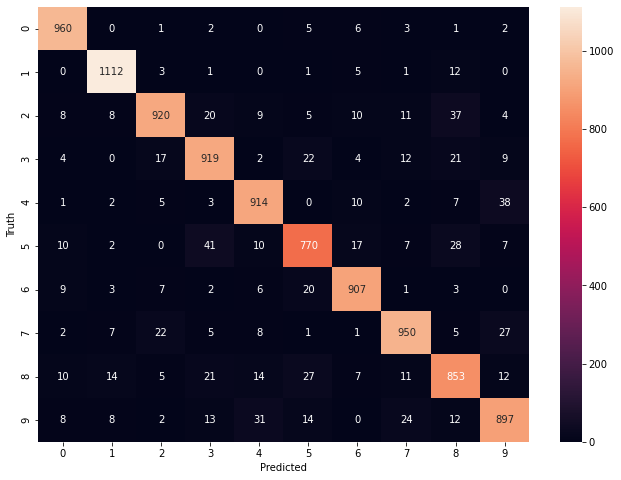

In [15]:
import seaborn as sn
plt.figure(figsize = (11,8))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Build and ANN model

In [16]:
#load the data
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [17]:
#normalize the data
X_train = X_train/255
X_test = X_test/255

In [19]:
#Build an ANN model for comparison
ann = models.Sequential([
        layers.Flatten(input_shape=(28,28)),
        layers.Dense(28, activation='relu'),
        layers.Dense(14, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
#train the model
ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - ETA: 0s - loss: 0.6919 - accuracy: 0.79 - 7s 3ms/step - loss: 0.6899 - accuracy: 0.7971
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2238 - accuracy: 0.9362
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1651 - accuracy: 0.9514
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1437 - accuracy: 0.9582
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1220 - accuracy: 0.9633
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1096 - accuracy: 0.9674
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0981 - accuracy: 0.9708
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0936 - accuracy: 0.9722
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0850 - accuracy: 0.9739
Epoch 10/10
1875/1875 [=================

In [21]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred_ann = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred_ann]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.97      0.98      0.97      1135
           2       0.93      0.95      0.94      1032
           3       0.97      0.95      0.96      1010
           4       0.97      0.96      0.97       982
           5       0.96      0.96      0.96       892
           6       0.98      0.97      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.93      0.94      0.94       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



Text(69.0, 0.5, 'Truth')

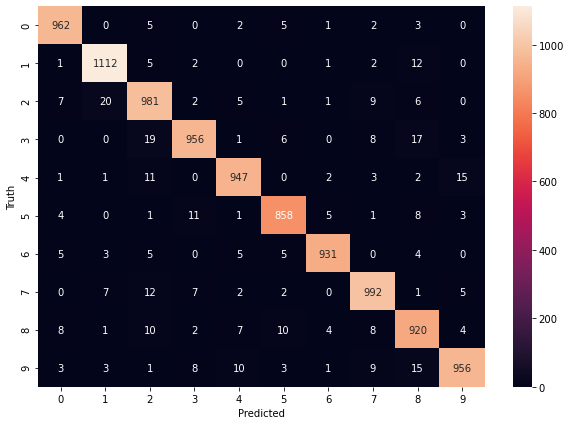

In [22]:
#print the confusion matrix
y_predicted = ann.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')